In [17]:
from sspredict.make_prediction.read_input import read_inputjson_edge_single_calculation
from sspredict.make_prediction.make_composition import build_mesh_ternary
from sspredict.make_prediction.models import ss_edge_model_T, ss_edge_model_T_w_uncertainty
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import rc, font_manager
ticks_font = font_manager.FontProperties(family='serif', style='normal',
                                         size=24, weight='normal', stretch='normal')

In [18]:
BCC_file = '../examples/BCC_edge/MoNbTaVW/sample_input_MoNbTaVW_BCC_edge.json'

In [19]:
input_data = read_inputjson_edge_single_calculation(BCC_file)
input_data.check_integrity_curtin_edge()
input_data.grab_properties_curtin_edge()

In [20]:
input_data.adjustable_scalers

[0.0833, 0.7844, 7.2993]

In [21]:
# calculate without uncertainty
model = ss_edge_model_T(input_data.adjustable_scalers,
                        input_data.exp_conditions,
                            input_data.element_composition,input_data.elements_data,input_data.structure)



In [22]:
model.calculate()

In [23]:
model.calc_data_all

,Mo,Nb,Ta,V,W,T,V_ave,b_ave,E_ave,G_ave,nu_ave,sum_cnVn^2_b6,Ty0,Delta_Eb,tau_y,Delta_sigma_ss
0,20.0,20.0,20.0,20.0,20.0,0.0,16.4,2.7702,263.7,92.0,0.433,0.003292,641.98,2.943,641.98,1964.47
1,20.0,20.0,20.0,20.0,20.0,100.0,16.4,2.7702,263.7,92.0,0.433,0.003292,641.98,2.943,558.14,1707.91
2,20.0,20.0,20.0,20.0,20.0,200.0,16.4,2.7702,263.7,92.0,0.433,0.003292,641.98,2.943,508.89,1557.21
3,20.0,20.0,20.0,20.0,20.0,300.0,16.4,2.7702,263.7,92.0,0.433,0.003292,641.98,2.943,467.59,1430.81
4,20.0,20.0,20.0,20.0,20.0,400.0,16.4,2.7702,263.7,92.0,0.433,0.003292,641.98,2.943,430.72,1317.99
5,20.0,20.0,20.0,20.0,20.0,500.0,16.4,2.7702,263.7,92.0,0.433,0.003292,641.98,2.943,396.83,1214.30
6,20.0,20.0,20.0,20.0,20.0,600.0,16.4,2.7702,263.7,92.0,0.433,0.003292,641.98,2.943,365.14,1117.34
7,20.0,20.0,20.0,20.0,20.0,700.0,16.4,2.7702,263.7,92.0,0.433,0.003292,641.98,2.943,335.18,1025.66
8,20.0,20.0,20.0,20.0,20.0,800.0,16.4,2.7702,263.7,92.0,0.433,0.003292,641.98,2.943,323.14,988.80
9,20.0,20.0,20.0,20.0,20.0,900.0,16.4,2.7702,263.7,92.0,0.433,0.003292,641.98,2.943,296.57,907.49


In [24]:
T = (model.calc_data_all['T'])

sigma_ss_1 = model.calc_data_all['Delta_sigma_ss']

No handles with labels found to put in legend.


Text(0, 0.5, 'Delta_sigma_ss (MPa)')

<Figure size 432x288 with 0 Axes>

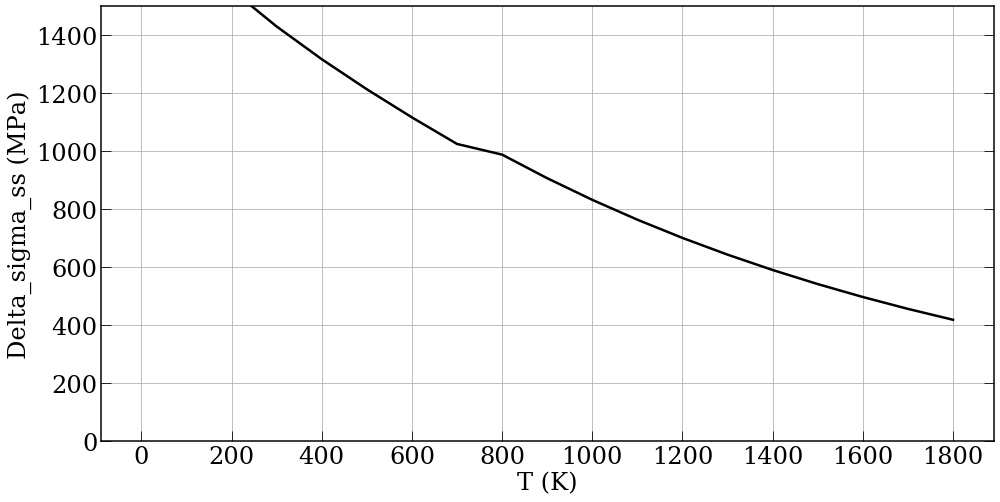

In [25]:
plt.draw()
f = plt.figure(figsize=(16,8))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

#ax1.set_xlim(0.0,1501)
ax1.set_ylim(0,1500)
ax1.grid()
colors=np.array([[0,0,0],[30,136,229],[225,193,7],[212,27,93]])/256
ax1.plot(T,sigma_ss_1,color='k',mec='k',mfc='None',ms=12,ls='-',lw=2.5,label='')

ax1.set_xticks([0,200,400,600,800,1000,1200,1400,1600,1800])
ax1.tick_params(direction='in',axis='both',length=10,right=True)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_xlabel('T (K)',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False)
ax1.set_ylabel('Delta_sigma_ss (MPa)',fontproperties=ticks_font)

In [26]:
# calculate with uncertainty
model_mc = ss_edge_model_T_w_uncertainty(ss_edge_model_T,input_data.adjustable_scalers,
                            input_data.exp_conditions,input_data.element_composition,
                            input_data.elements_data,input_data.uncertainty_levels,input_data.structure)
model_mc.calculate()


In [27]:
T = (model.calc_data_all['T'])
sigma_ss = model_mc.calc_data_all['Delta_sigma_ss']
std_sigma_ss = model_mc.calc_data_all['std_Delta_sigma_ss']


In [28]:
paper_data = pd.read_csv('./MoNbTaVW_paper_extracted.csv',sep='\s+')


Text(0, 0.5, 'Tensile Yield Stress (MPa)')

<Figure size 432x288 with 0 Axes>

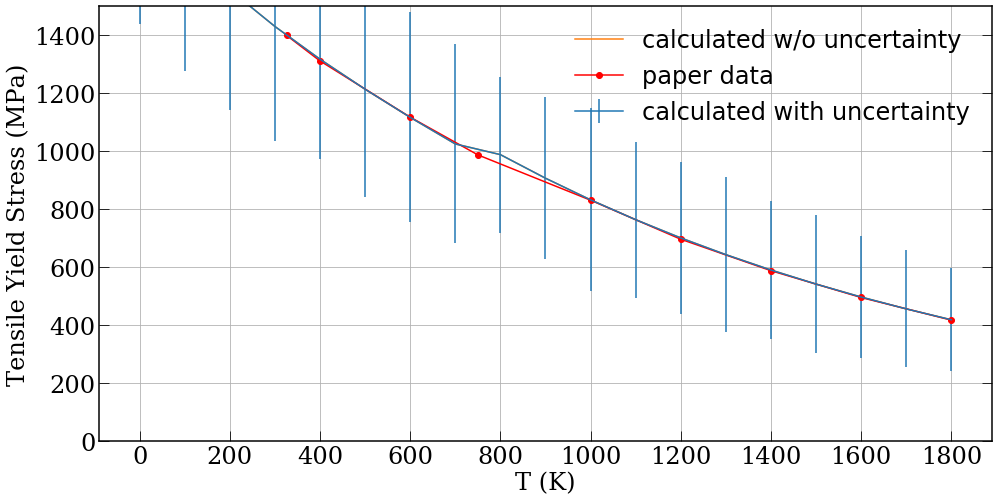

In [29]:
plt.draw()
f = plt.figure(figsize=(16,8))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

#ax1.set_xlim(0.0,1501)
ax1.set_ylim(0,1500)
ax1.grid()
colors=np.array([[0,0,0],[30,136,229],[225,193,7],[212,27,93]])/256
ax1.errorbar(T,sigma_ss,std_sigma_ss,label='calculated with uncertainty')
ax1.plot(T,sigma_ss_1,label='calculated w/o uncertainty')
ax1.plot(paper_data['x'],paper_data['y'],'ro-',label='paper data')

ax1.set_xticks([0,200,400,600,800,1000,1200,1400,1600,1800])
ax1.tick_params(direction='in',axis='both',length=10,right=True)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_xlabel('T (K)',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False)
ax1.set_ylabel('Tensile Yield Stress (MPa)',fontproperties=ticks_font)

In [30]:
# NOTE
# The data reported in the paper came from the full theory prediction,
# using the full theory for the alloy
# the yield stress is about 630MPA
# the energy barrier is about 2.8-2.9 eV

# for this reduced theory 
print('The yield stress is {}, the energy barrier is {}'.format(model.Ty0/1e6, model.calc_data_all['Delta_Eb'][0]))
# expect 10% difference between the full and reduced theory.
# this result is actually very good.

# also note at about 800 K,
# the calculation without uncertainty differs from the paper value,
# this is due to the transition from multi bow out to single bow out 
# in the mc runs, 1000 samples were collected, 
# by increasing the number of samples, this will eventually converge to the value. 
# but that takes up too much time, so it is not supported as an input parameter

The yield stress is 641.98210592747, the energy barrier is 2.943
